<div id=\"image\">
<img src=https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png  WIDTH=280 HEIGHT=280>
</div>
<div id=\"subject\">
<CENTER>
</br>
<font size=\"3\"></br> <h1>Séparation aveugle de sources</h1></font></br></div>
</CENTER>
<CENTER>
<span style=\"color:black\">Tales Marra - tales.marra@imt-atlantique.net</span>
<CENTER>
<span style=\"color:black\">Gustavo Rodrigues - gustavo.rodrigues-dos-reis@imt-atlantique.net</span>
<CENTER>
</CENTER>
</div>

## Question 1

Deux variables aléatoires sont dites décorrelés si:

\begin{equation} Cov (X,Y) = 0 \end{equation}

Deux variables aléatoires sont indépendants si et seulement si:

\begin{equation} P(X<x \cap Y<y) = P(X<x)P(Y<y)\end{equation}

L'indépendance implique,donc, la décorrelation.

## Question 2

Afin d'avoir le bon résultat, il suffit de multiplier la matrice $W$ à gauche de l'équation:

\begin{equation} x = As \end{equation}
\begin{equation} Wx = WAs \end{equation}

Mais comment on sait que:

\begin{equation} WA = I \end{equation} 

Avec $I$ la matrice identité d'ordre $n$,

\begin{equation} Wx = s \end{equation}

## Question 3

Si $m$<$n$, on ne pourrait pas retrouver une matrice inverse à $A$, et donc, avec ACI (_Analyse en Composants Indépendants_), ce serait impossible de réconstruire les signaux originaux.

## Question 4

\begin{equation} E\{{s_i}\} = \int_{-\infty}^{\infty} xf_i dx\end{equation}  

$f_i$ étant la densité de probabilité de chaque $s_i$.

Comme $f_i$ n'est pas nulle que entre $-\sqrt3$ et $-\sqrt3$, l'équation ci-dessus devient:

\begin{equation}E\{{s_i}\} = \int_{-\sqrt3}^{\sqrt3} \frac{1}{2\sqrt{3}} x dx = 0\end{equation}

Maintenaint il faut calculer $E\{s_i^{2}\}$.

\begin{equation}E\{s_i^{2}\} = \int_{-\infty}^{\infty} x^{2}f_i \end{equation}

Qui à sa fois devient:

\begin{equation}E\{{s_i}\} = \int_{-\sqrt3}^{\sqrt3} \frac{1}{2\sqrt{3}} x^{2} dx = 1\end{equation}

Comme:

\begin{equation}\sigma^{2}\{s_i\} = E\{x_i^{2}\} - E\{x_i\}^{2}\end{equation}

\begin{equation}\sigma^{2}\{s_i\} = 1 \end{equation}

## Question 5

Comme $s1$ et $s2$ sont indépendants,

\begin{equation} f(s1,s2) = f_{s1}f_{s2}\end{equation}

\begin{equation} f(s1,s2) = \frac{1}{12}\ , |{x}| \leq \sqrt3 \end{equation}
\begin{equation} f(s1,s2) = 0 , sinon\end{equation}

## Question 6

Non, les nouveaux signaux obtenus ne sont plus indépendants.

In [4]:
import numpy as np
import random
import math
import sounddevice 

In [2]:
def generate_process_X():
    proba_s1 = list()
    proba_s2 = list()
    for i in range (0,1000):
        s1 =  np.random.uniform()
        s2 =  np.random.uniform()
        if s1>= -np.sqrt(3) and s1<= np.sqrt(3):
            s1 = s1+np.sqrt(3)
            proba_s1.append((s1,(1/(2*np.sqrt(3)))*(s1)))
        else:
            proba_s1.append((s1,0.0))
        if s2>= -np.sqrt(3) and s2<= np.sqrt(3):
            s2 = s2+np.sqrt(3)
            proba_s2.append((s2,(1/(2*np.sqrt(3)))*(s2)))
        else:
            proba_s2.append((s2,0.0))
    return proba_s1,proba_s2


In [3]:
realizations_s1,realizations_s2 = generate_process_X()

In [4]:
s1_s2_realizations = list()
import matplotlib.pyplot as plt
plt.figure()
plt.title('realizations s1 et s2')
for i,element in enumerate(realizations_s1):
    proba_s1 = element[1]
    proba_s2 = realizations_s2[i][1]
    s1_s2_realizations.append ((proba_s1,proba_s2))

plt.scatter([i[0] for i in s1_s2_realizations],[i[1] for i in s1_s2_realizations])
plt.xlabel('s1')
plt.ylabel('s2')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
A = np.array((1,1,-1,2))

In [6]:
A = A.reshape(2,-1)

In [7]:
s1 = [i[0] for i in s1_s2_realizations]
s2 = [i[1] for i in s1_s2_realizations]
s_matrix = np.array([s1,s2])
x_matrix = np.dot(A,s_matrix)

In [8]:
x1,x2 = x_matrix[0,:],x_matrix[1,:]

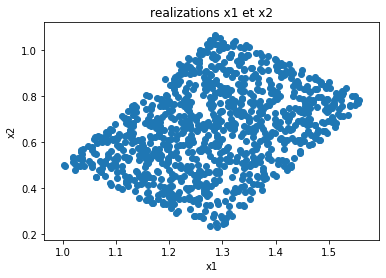

In [9]:
plt.figure()
plt.title('realizations x1 et x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1,x2)
plt.show()

## Question 7

In [10]:
A_est = np.array((0.3,0.3,-0.3,0.6))
A_est = A.reshape(2,-1)

W = np.linalg.inv(A_est)
s_matrix_reconstructed = np.dot(W,x_matrix)

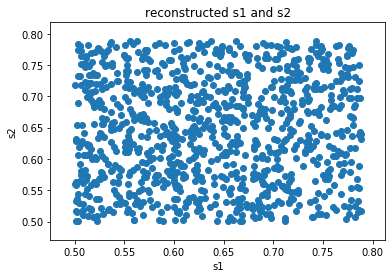

In [11]:
z1,z2 = s_matrix_reconstructed[0,:],s_matrix_reconstructed[1,:]
plt.figure()
plt.title('reconstructed s1 and s2')
plt.xlabel('s1')
plt.ylabel('s2')
plt.scatter(z1,z2)
plt.show()

la limitation de cette techinque 

## Question 8

Pour le Cas Gaussian:

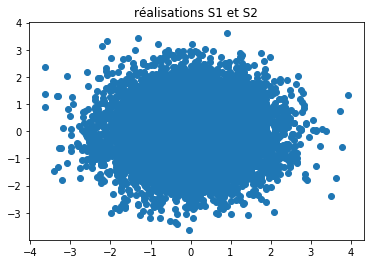

In [12]:
import numpy as np
import random
import math
import scipy.stats
import matplotlib.pyplot as plt

s1_g = np.random.normal(0,1,10000)
s2_g = np.random.normal(0,1,10000)

plt.figure()
plt.title('réalisations S1 et S2')
plt.scatter(s1_g,s2_g)

A_g = np.array((1,1,-1,2))

A_g = A_g.reshape(2,-1)

s_matrix_g = np.array([s1_g,s2_g])
x_matrix_g = np.dot(A,s_matrix_g)

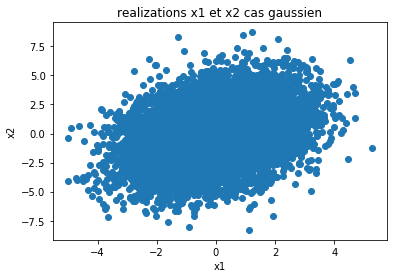

In [13]:
x1_g,x2_g = x_matrix_g[0,:],x_matrix_g[1,:]
plt.figure()
plt.title('realizations x1 et x2 cas gaussien')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1_g,x2_g)
plt.show()

Conclusion: Non, c'est ne pas possible lorsque l'estimation des coefficients de la matrice A commence à devenir copmpliqué.

## Question 9

\begin{equation}X = s_1 + s_2 \end{equation}

\begin{equation}f_X(x) = \int_{-\infty}^{\infty} f_{s1}(x-u)f_{s2}(u) du \end{equation}

Dans le cas où $-\sqrt{3} \leq x \leq 0$:

\begin{equation}f_X(x) = \int_{-\sqrt{3}}^{x} \frac{1}{2\sqrt{3}}\frac{1}{2\sqrt{3}} du \end{equation}


\begin{equation}f_X(x) = (\frac{1}{2\sqrt{3}})^{2} (x + \sqrt{3}) \end{equation}

Dans le cas où $0 < x \leq \sqrt{3}$:

\begin{equation}f_X(x) = \int_{x}^{\sqrt{3}} \frac{1}{2\sqrt{3}}\frac{1}{2\sqrt{3}} du \end{equation}

\begin{equation}f_X(x) = (\frac{1}{2\sqrt{3}})^{2} (-x + \sqrt{3}) \end{equation}

Lorsqu'on considere:

\begin{equation}Z = s_1 + s_2 +s_3 = X + s_3\end{equation}

\begin{equation}f_Z(x) = \int_{-\infty}^{\infty} f_{X}(x-u)f_{s3}(u) du \end{equation}

Dans le cas où $-\sqrt{3} \leq x \leq 0$:

\begin{equation}f_Z(x) = \int_{-\sqrt{3}}^{x} \frac{1}{(2\sqrt{3})^{2}}\frac{1}{2\sqrt{3}}(u+\sqrt{3}) du \end{equation}

\begin{equation}f_Z(x) = (\frac{1}{2\sqrt{3}})^{3} (\frac{x^{2}}{2} + \sqrt{3}x + \frac{3}{2}) \end{equation}

Dans le cas où $0 < x \leq \sqrt{3}$:

\begin{equation}f_Z(x) = \int_{x}^{\sqrt{3}} \frac{1}{(2\sqrt{3})^{2}}\frac{1}{2\sqrt{3}}(\sqrt{3}-u) du \end{equation}

\begin{equation}f_Z(x) = (\frac{1}{2\sqrt{3}})^{3} (\frac{x^{2}}{2} - \sqrt{3}x + \frac{3}{2}) \end{equation}

Si on regarde graphiquement le comportement de  $f_X$ et $f_Z$, on voit que lorsqu'on commence a adicioner plus des signaux, la distribution conjointe de probabilité tombe vers une gaussiene.

## Question 10

Soit $x$ variable gaussienne centrée.

Afin de calculer le kurtosis de x comme défini à l'énnonce, il faut calculer d'abord $E\{x^{4}\}$.

Pour une distribution gaussienne centrée et de variance unitaire,

\begin{equation}f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} e^{{\frac{-x^{2}}{2}}}dx \end{equation}

\begin{equation}E\{x^{4}\} = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} x^{4} f(x) dx \end{equation}

\begin{equation}E\{x^{4}\} = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} x^{4} e^{{\frac{-x^{2}}{2}}} dx \end{equation}

Si on définit $y = x^{2}$,

\begin{equation}dy = 2x dx, dx = \frac{dy}{2x} \end{equation}

et,donc:

\begin{equation} E\{x^{4}\} = \frac{2}{\sqrt{2\pi}}\int_{0}^{\infty} \frac{y^{2}}{2\sqrt{y}} e^{\frac{-y}{2}} dy \end{equation}

\begin{equation} E\{x^{4}\} = \frac{2}{\sqrt{2\pi}}\int_{0}^{\infty} y^\frac{3}{2}e^{\frac{-y}{2}} dy \end{equation}

Comme:

\begin{equation}\int x^{n}e^{ax} dx  = \frac{x^{n}e^{ax}}{a} - \frac{n}{a}\int x^{n-1}e^{ax} dx \end{equation}

En dévellopant les calculs, on arrive à:

\begin{equation} E\{x^{4}\} = 3 \end{equation}

Puis on passe au calcul du deuxième terme, $-3(E\{x^{2}\})^{2}$:

Comme x est centrée, $E\{x\} = 0$. Comme $\sigma^{2}\{x\} = 1$:

\begin{equation}kurt(x) = 0\end{equation}




## Question 11

On doit montrer que $E\{\widetilde{x}\widetilde{x}^{T}\} = I_n$ .

\begin{equation} \widetilde{x} = ED^{\frac{-1}{2}}E^{T}x \end{equation}

\begin{equation} \widetilde{x}^{T} = x^{T}E(D^{\frac{-1}{2}})^{T}E^{T} \end{equation}

\begin{equation} \widetilde{x}\widetilde{x}^{T} = ED^{\frac{-1}{2}}E^{T}xx^{T}E(D^{\frac{-1}{2}})^{T}E^{T} \end{equation}

Comme les matrices sont ortogonales,

\begin{equation} {x}{x}^{T} = {x}{x}^{-1} = I_n, {E}{E}^{T} = I_n \end{equation}


\begin{equation} {x}{x}^{T} = I_n, {E}{E}^{T} = I_n, D^{\frac{-1}{2}}(D^{\frac{-1}{2}})^{T} = I_n\end{equation}

On déduit que \begin{equation}E\{\widetilde{x}\widetilde{x}^{T}\} = I_n\end{equation}


## Question 12

\begin{equation} G(y) = log (cosh(y))\end{equation}

\begin{equation} g(.) = G^{'}(y) = senh(y)\frac{1}{cosh(y)} = tanh(y)\end{equation}

\begin{equation} g^{'}(.) = \frac{senh^{2}(y)-cosh^2(y)}{cosh^{2}(y)} = \frac{1}{cosh^{2}(y)} = sech^{2}(y)\end{equation}

Donc, 

\begin{equation} g^{'}(.) = sech^{2}(y) \end{equation}



## Question 13

In [6]:
i1 = np.fromfile('./Input_and_Reference_files/In_1.txt',dtype=np.float64)
i2 = np.fromfile('./Input_and_Reference_files/In_2.txt',dtype=np.float64)

Blanchement:

In [7]:
x = np.vstack((i1,i2))

In [8]:
x_t = np.transpose(x)

In [9]:
product = np.matmul(x,x_t)

In [10]:
product.shape

(2, 2)

In [11]:
product = product/220500

In [12]:
E,D,E_t =np.linalg.svd(product)

In [13]:
D = np.array([1/0.05334122,0,0,1/0.02828295]).reshape(-1,2)

In [14]:
D = np.sqrt(D)

In [15]:
x_til = np.matmul(E,D)
x_til = np.matmul(x_til,E_t)
x_til = np.matmul(x_til,x)

Algorithme:

In [16]:

#Générer un vector w aléatoire [2,1]

w = np.random.rand(2,1)
w_t = np.transpose(w)
global_w=0
for n in range(100):
    w_t = np.transpose(w)

    
    #Multiplier w_T pour x (après le blanchiment)
    product1 = np.matmul(w_t,x_til)
    
    #Appliquer la fonction tanh element-wise dans le résultat
    product1 = np.tanh(product1)
    
    #Construire une matrice qui repete le resultat antérieur dans ses 2 lignes
    prod_new1 = np.tile(product1,2)
    prod_new1 = prod_new1.reshape(2,-1)
    
    #Multiplier le résultat à gauche pour x blanchit
    result1 =np.multiply(x_til,prod_new1)
    
    #L'espérance est la moyenne empirique
    terme1= np.reshape(np.mean(result1,axis=1),(2,1))
    
    #Pour le deuxième terme:
    
    #Multiplier x blanchit par w_T à gauche
    product2 = np.matmul(w_t,x_til)
    
    #Appliquer la fonction sech² element-wise dans le résultat
    product2 = np.power(np.cosh(product2), -2)
    
    #L'espérance est la moyenne empirique
    product2 = np.mean(product2,axis=1)
    
    #Multiplier le résultat par w à droite
    terme2 = product2*w
    
    #La différence entre les deux termes est calculée
    w_plus = terme1 - terme2
    
    #Normalisation de w
    w_plus = w_plus/np.linalg.norm(w_plus,2)
    
    #w reçoit la nouvelle valeur
    w = w_plus
    global_w = w
print(global_w)

[[0.58982072]
 [0.80753422]]


In [17]:
s1 = np.fromfile('./Input_and_Reference_files/Ref_1.txt',dtype=np.float64)
s2 = np.fromfile('./Input_and_Reference_files/Ref_2.txt',dtype=np.float64)

In [18]:
s_chap = np.dot(global_w.T,x_til)
prod = 1 - np.square(np.dot(s_chap,s1)/(np.linalg.norm(s1,2)*np.linalg.norm(s_chap,2)))
EQMN = 10*math.log10(prod.item())

In [19]:
print('EQMN en db:', EQMN)

EQMN en db: -57.15649796827768


Cherchant la deuxième composant indépendate:

In [20]:
w1 = global_w
w2 = np.random.rand(2,1)
while np.dot(w2.T,w1)>0.000001:
    w2 = w2 - np.matmul(w2.T,w1)*w1
    w2 = w2/np.linalg.norm(w2,2)

In [22]:
w_matrix = np.vstack((w1,w2)).reshape(2,2)

In [23]:
s1 = np.fromfile('./Input_and_Reference_files/Ref_1.txt',dtype=np.float64)
s2 = np.fromfile('./Input_and_Reference_files/Ref_2.txt',dtype=np.float64)

In [24]:
s_matrix = np.vstack((s1,s2))

In [25]:
s_chap = np.dot(w_matrix.T,x_til)
prod1 = 1 - np.square(np.dot(s_matrix[0,:].T,s_chap[0,:])/(np.linalg.norm(s_matrix[0,:],2)*np.linalg.norm(s_chap[0,:],2)))
prod2 = 1 - np.square(np.dot(s_matrix[1,:].T,s_chap[1,:])/(np.linalg.norm(s_matrix[1,:],2)*np.linalg.norm(s_chap[1,:],2)))
EQMN1 = 10*math.log10(prod1.item())
EQMN2 = 10*math.log10(prod2.item())

EQMN for the reconstruction:

In [48]:
print(EQMN1,'db',EQMN2,'db')

-57.1564979662735 db -57.15667994161004 db


In [27]:
fs = 44100

Playing original signals:

In [8]:
sounddevice.play(s1, fs)

In [9]:
sounddevice.play(s2, fs)

Playing input files:

In [12]:
sounddevice.play(i1, fs)

In [13]:
sounddevice.play(i2, fs)

Playing reconstructed signals:

In [28]:
sounddevice.play(s_chap[0,:], fs)

In [29]:
sounddevice.play(s_chap[1,:], fs)

## Question 15

In [30]:
def matrice_corr(v1,v2,window_size):
    R = np.zeros((window_size,window_size))
    size = int(v1.shape[0]/window_size)
    for i in range(size):
        begin = i*window_size
        s1 = v1[begin:begin+window_size]
        s2 = v2[begin:begin+window_size]
        R += np.outer(s1,s2)
    R /= size
    return R

In [31]:
i1 = np.fromfile('./Input_and_Reference_files/In_1.txt',dtype=np.float64)
i2 = np.fromfile('./Input_and_Reference_files/In_2.txt',dtype=np.float64)

In [32]:
R_x1_x1 = matrice_corr(i1,i1,10)

In [33]:
R_x1_x2 = matrice_corr(i1,i2,10)

In [34]:
R_x2_x2 = matrice_corr(i2,i2,10)

In [35]:
T1 = np.trace(R_x1_x1)
T2 = np.trace(R_x2_x2)
T12 = np.trace(R_x1_x2)

In [36]:
def off(M):
    N = M.shape[0]
    total_sum = np.sum(M)
    off = total_sum - np.trace(M)
    return off/ (N*(N-1))

In [37]:
F1 = off(R_x1_x1)
F2 = off(R_x2_x2)
F12 = off(R_x1_x2)

In [38]:
alpha = 2*F12*T12 -(F1*T2 + F2*T1)
beta = 2*(T12**2 - T1*T2)
gamma_2 =(F1*T2 - F2*T1)**2 + 4*(F12*T2 - T12*F2)*(F12*T1-T12*F1)
gamma = math.sqrt(gamma_2)
d1 = alpha - gamma
d2 = alpha + gamma

In [39]:
a11 = beta*F1 - T1*d1
a12 = beta*F12 - T12*d2
a21 = beta*F12 - T12*d1
a22 = beta*F2 - T2*d2

A_chap = np.array([a11, a12, a21, a22]).reshape(2,-1)

In [40]:
x = np.vstack((i1,i2))

In [41]:
W = np.linalg.inv(A_chap)
s_chap_SOBI = np.matmul(W,x)

In [42]:
s1 = np.fromfile('./Input_and_Reference_files/Ref_1.txt',dtype=np.float64)
s2 = np.fromfile('./Input_and_Reference_files/Ref_2.txt',dtype=np.float64)

In [43]:
s_matrix = np.vstack((s1,s2))

In [44]:
prod1 = 1 - np.square(np.dot(s_matrix[0,:].T,s_chap_SOBI[0,:])/(np.linalg.norm(s_matrix[0,:],2)*np.linalg.norm(s_chap_SOBI[0,:],2)))
prod2 = 1 - np.square(np.dot(s_matrix[1,:].T,s_chap_SOBI[1,:])/(np.linalg.norm(s_matrix[1,:],2)*np.linalg.norm(s_chap_SOBI[1,:],2)))
EQMN1 = 10*math.log10(prod1.item())
EQMN2 = 10*math.log10(prod2.item())

In [45]:
print(EQMN1,'db',EQMN2,'db')

-76.63165257677974 db -76.63165293198534 db


Playing reconstructed signals:

In [51]:
sounddevice.play(s_chap_SOBI[0,:], fs)

In [52]:
sounddevice.play(s_chap_SOBI[1,:], fs)